## Plotting mean length maps

In this example, we show how to plot the maps of mean length

Note that the ``apecosm.extract_weighted_data`` function cannot be used here, since the latter computes weighted **horizontal averages** of variables such as the functional response, and therefore produces time-series rather than maps

In [1]:
import os
import apecosm
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import AxesGrid
from cartopy.mpl.geoaxes import GeoAxes

In [2]:
mesh_file = os.path.join('..', 'data', 'pacific_mesh_mask.nc')

In [3]:
mesh = apecosm.open_mesh_mask(mesh_file)

In [4]:
dirin = os.path.join('..', 'data', 'apecosm')

In [5]:
const = apecosm.open_constants(dirin)

In [6]:
data = apecosm.open_apecosm_data(dirin, replace_dims={'community': 'c'})

Now, we extract the biomass density and convert it using the `weight_step` variable, in order to obtain values in $J.m^{-2}$. We also set the ``nan`` values to 0

In [7]:
oope = (data['OOPE'] * const['weight_step'])
oope = oope.fillna(0)

Now we weight the length, in ``cm``, using the ``oope`` variable and we average over all dimensions but ``x``, ``y`` and ``c``.

In [10]:
length = (const['length'] * 100).weighted(oope)
length = length.mean(dim=['time', 'w'])
length = length.compute()

The result is 5 maps, one for each community, showing the mean length for each community.

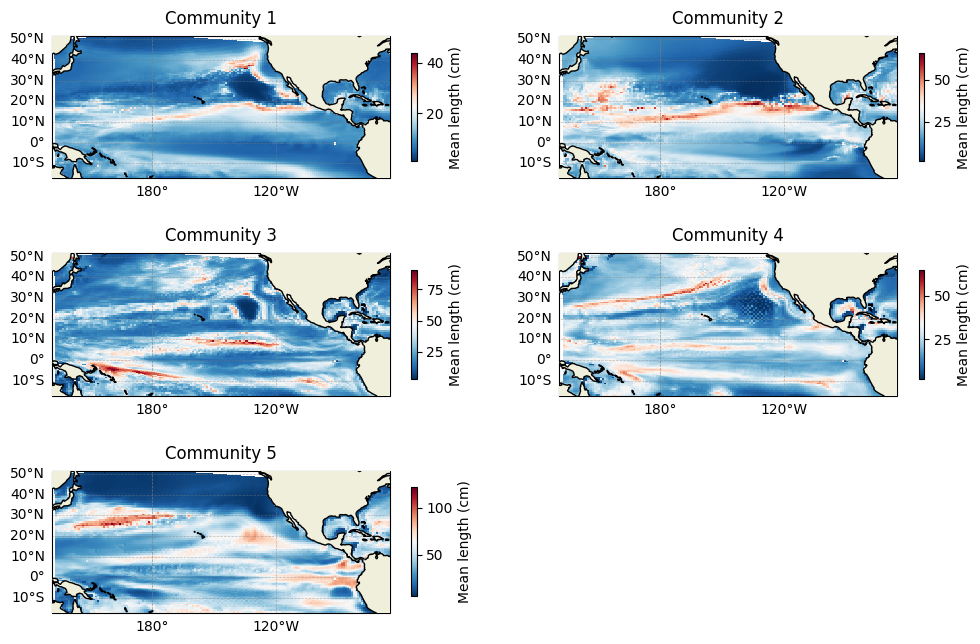

In [11]:
fig = plt.figure(figsize=(12, 8))

gridparams = {'crs': ccrs.PlateCarree(central_longitude=0), 'draw_labels':True, 
              'linewidth':0.5, 'color':'gray', 'alpha':0.5, 'linestyle':'--'}

plt.rcParams['image.cmap'] = 'RdBu_r'

for c in range(5):
    ax = plt.subplot(3, 2, c + 1, projection=ccrs.PlateCarree(central_longitude=180))
    cs = apecosm.plot_pcolor_map(length.isel(c=c), mesh, axis=ax)
    cs.set_clim(length.isel(c=c).min(), length.isel(c=c).max())
    cb = plt.colorbar(cs, shrink=0.6)
    cb.set_label('Mean length (cm)')
    ax.set_title(f'Community {c + 1}')
    gl = ax.gridlines(**gridparams)
    gl.top_labels = False
    gl.right_labels = False